In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feature_df = pd.read_csv('House_data.csv')
feature_df = feature_df.head(100)

In [3]:
feature_df['basement'] = (feature_df['sqft_basement'] > 0).astype(int)
feature_df['renovated'] = (feature_df['yr_renovated'] > 0).astype(int)
to_drop = ['id', 'date', 'sqft_basement', 'yr_renovated']
feature_df.drop(to_drop, axis = 1, inplace = True)
cat_cols = ['waterfront', 'view', 'condition', 'grade', 'floors']
feature_df = pd.get_dummies(feature_df, columns = cat_cols, drop_first=True)

In [4]:
y = feature_df.iloc[:, 0].values
X = feature_df.iloc[:, 1:].values

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)

tree_clf.feature_importances_

array([0.05183795, 0.05180366, 0.07296732, 0.07220497, 0.07047966,
       0.07122456, 0.07221617, 0.07293108, 0.07745694, 0.0707418 ,
       0.07143447, 0.02748003, 0.00644264, 0.00122579, 0.00460248,
       0.01479904, 0.00461528, 0.00275704, 0.02717017, 0.02363135,
       0.01207204, 0.00828024, 0.02227553, 0.01959461, 0.01335748,
       0.0070691 , 0.0040862 , 0.0170152 , 0.02310875, 0.00511849])

In [6]:

importances = tree_clf.feature_importances_
feature_names = feature_df.iloc[:, 1:].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
feature_imp_dir

{'bedrooms': 0.05183795489656588,
 'bathrooms': 0.05180365587269829,
 'sqft_living': 0.07296731884196252,
 'sqft_lot': 0.07220496702120145,
 'sqft_above': 0.07047965673672119,
 'yr_built': 0.07122456066687931,
 'zipcode': 0.07221617063422694,
 'lat': 0.07293107848457356,
 'long': 0.07745693811352776,
 'sqft_living15': 0.07074179661911975,
 'sqft_lot15': 0.07143446602753853,
 'basement': 0.02748002922664791,
 'renovated': 0.006442642281736402,
 'waterfront_1': 0.0012257856399812282,
 'view_2': 0.0046024774940083705,
 'view_3': 0.014799035656724552,
 'view_4': 0.004615279540214109,
 'condition_2': 0.0027570389038585096,
 'condition_3': 0.02717016608844649,
 'condition_4': 0.023631353493822668,
 'condition_5': 0.012072041424022573,
 'grade_6': 0.00828024173515278,
 'grade_7': 0.022275527844289093,
 'grade_8': 0.019594606820958232,
 'grade_9': 0.013357475828527216,
 'grade_10': 0.007069098550959184,
 'grade_11': 0.004086197321313936,
 'floors_1.5': 0.017015199354238085,
 'floors_2.0': 0.02

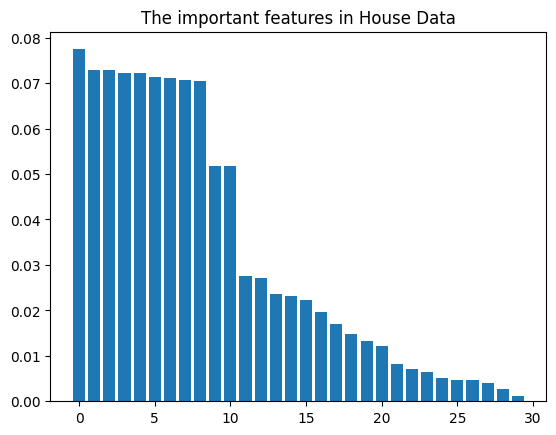

In [7]:
plt.bar(range(len(features)), [imp[1] for imp in features], align='center')
plt.title('The important features in House Data');

In [8]:

from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X)
print('Total Features count:', np.array(X).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])

Total Features count: 30
Selected Features:  11
